In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from pydrake.geometry.optimization import HPolyhedron
from pydrake.solvers import MosekSolver
from pydrake.trajectories import PiecewisePolynomial

from gcs.bezier import BezierGCS
from gcs.linear import LinearGCS
from gcs.rounding import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


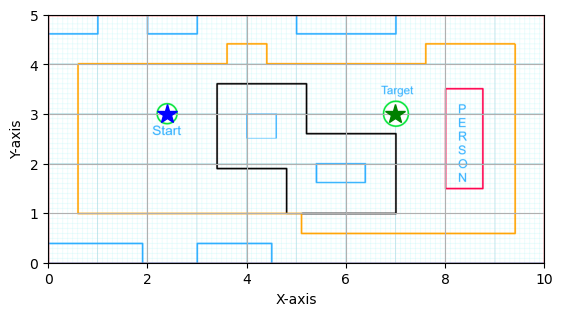

In [13]:

# Create a figure and axis
fig, ax = plt.subplots()

# Define the rectangle parameters
length = 10
breadth = 5

# Create a rectangle patch
rectangle = patches.Rectangle((0, 0), length, breadth, linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle to the axis
ax.add_patch(rectangle)

# Set axis limits based on rectangle dimensions
ax.set_xlim(0, length)
ax.set_ylim(0, breadth)

# Set labels for the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')

# Load and display the image
img = mpimg.imread('map.png')  # Replace with the actual path to your image
img_extent = [0, length, 0, breadth]
ax.imshow(img, extent=img_extent, alpha=1.0)  # Adjust alpha for transparency

# start and stop 
x_start = np.array([2.4,3])
x_goal = np.array([7,3])

plt.plot(x_start[0], x_start[1], 'b*', markersize=15)
plt.plot(x_goal[0], x_goal[1], 'g*', markersize=15)

# Display the plot
plt.grid(True)
plt.show()


In [ ]:
#Define regions


In [ ]:
b_gcs = BezierGCS(regions, order=5, continuity=2)
b_gcs.addTimeCost(1)
b_gcs.addPathLengthCost(1)
b_gcs.addSourceTarget(x_start, x_goal)
b_gcs.setSolver(MosekSolver())
bezier_traj = b_gcs.SolvePath(convex_relaxation)[0]

samples = np.linspace(bezier_traj.start_time(), bezier_traj.end_time())
values = np.squeeze([bezier_traj.value(s) for s in samples])
plt.plot(values[:, 0], values[:, 1], "c-")